# Iris Species Classification – Machine Learning Pipeline

This notebook presents a complete supervised machine learning workflow
to classify Iris flower species using numerical features.
The focus is on data exploration, model comparison, and evaluation.

**Step 1: Importing the Required Libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




We import all necessary libraries for data processing, model training, evaluation, and visualization.

**Step 2: Load and Explore the Dataset**

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


We loaded the Iris dataset and converted it into a DataFrame. The dataset includes:

150 samples

4 features: sepal length, sepal width, petal length, petal width

A target column representing the species as 0, 1, or 2

**Step 3: Dataset Information and Basic Checks**

In [ ]:
df.info()
df.isnull().sum()
print(df['target'].unique())
print(iris.target_names)
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
[0 1 2]
['setosa' 'versicolor' 'virginica']


,count
target,
0,50
1,50
2,50


No missing values.

Three species: 0: setosa, 1: versicolor, 2: virginica

Balanced dataset: 50 samples for each species.

**Step 4: Data Visualization**

*(a) Target Distribution*

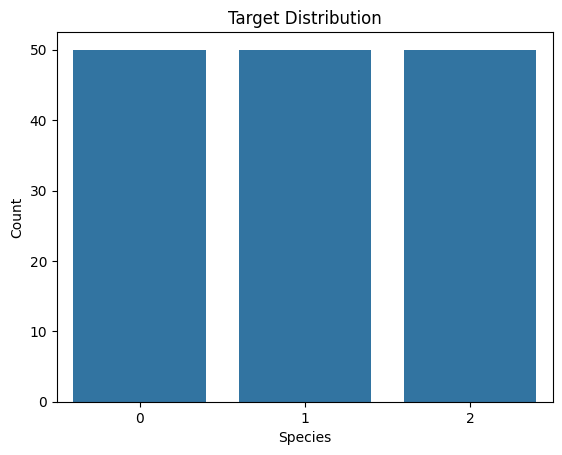

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


Each species appears 50 times, confirming class balance.

*(b) Feature Distributions (Histograms)*

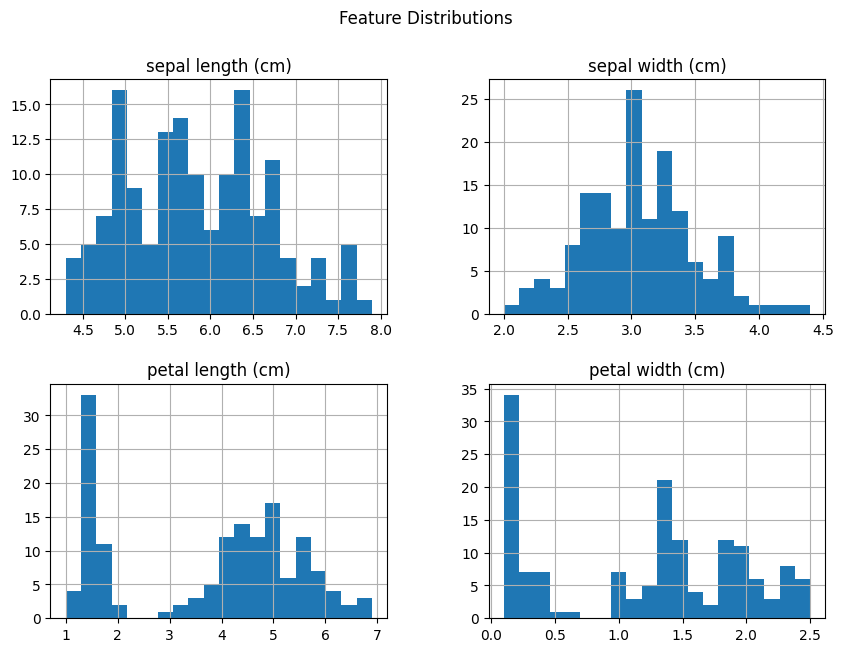

In [ ]:
df.drop('target', axis=1).hist(bins=20, figsize=(10, 7))
plt.suptitle('Feature Distributions')
plt.show()


Histograms help visualize how values are spread for each feature.

*(c) Boxplots by Species*

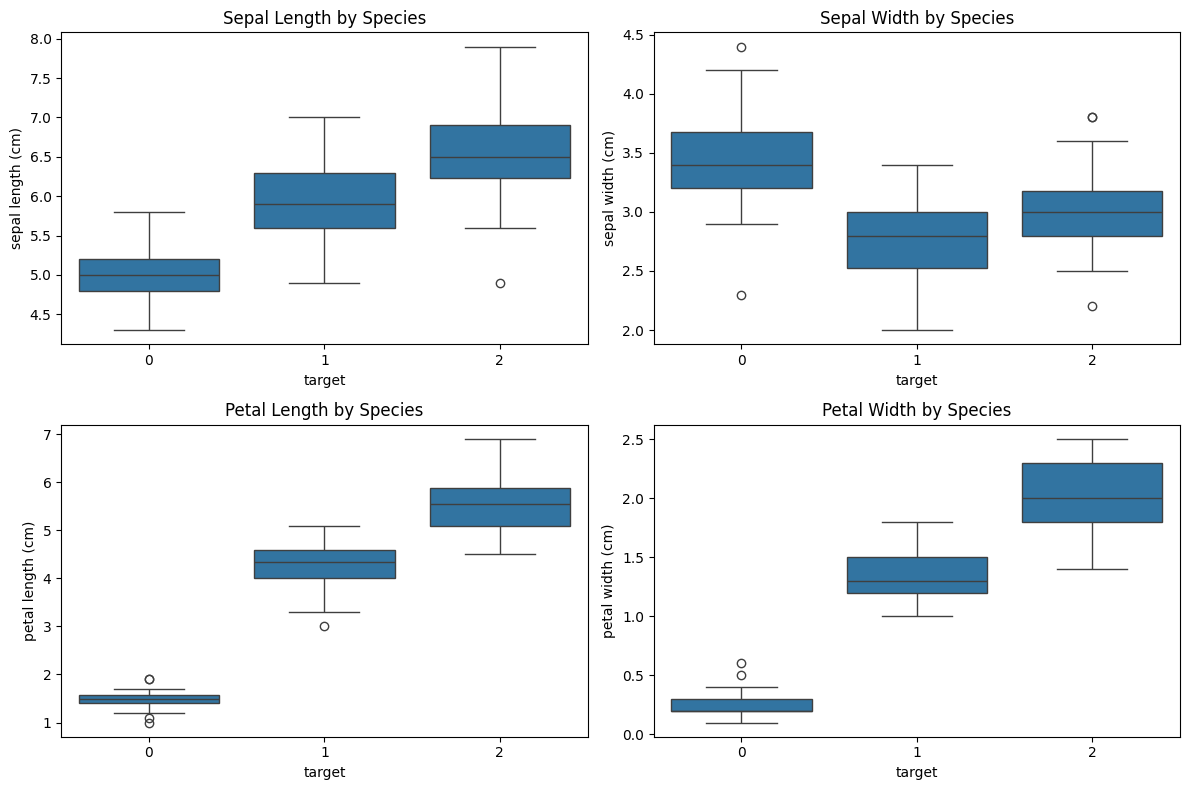

In [ ]:

# Boxplots for each feature by target class
plt.figure(figsize=(12, 8))

# Boxplot for Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.title('Sepal Length by Species')

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='target', y='sepal width (cm)', data=df)
plt.title('Sepal Width by Species')

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.title('Petal Length by Species')

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

 We created scatter plots to visualize the relationships between pairs of features (sepal length, sepal width, petal length, petal width). The `hue='target'` parameter was used to color the points based on their species, allowing us to observe how different species are distributed across these feature combinations.






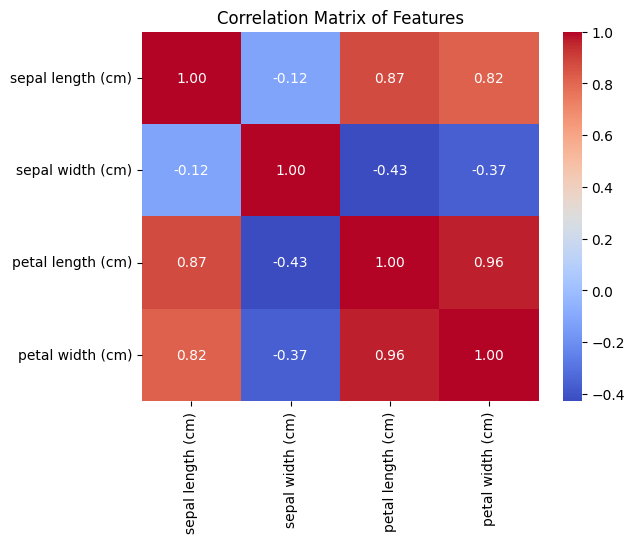

In [ ]:
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()




> We used a heatmap to visualize the correlations between the features. The correlation coefficients indicate the strength and direction of the relationships among the features. For example:
>
> * The correlation between petal length and petal width is **0.96**, indicating a very strong positive relationship. This means that as petal length increases, petal width tends to increase as well.
> * The correlation between sepal length and petal width is **0.82**, which reflects a strong positive correlation. While not as strong as the correlation between petal length and width, it still suggests a clear relationship between these two features.


**Step 5: Data Preparation**

In [ ]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We split the data into:

80% training set (120 samples)

20% test set (30 samples)

**Step 6: Feature Scaling (Standardization)**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Interpretation:
StandardScaler makes all features have mean 0 and standard deviation 1 — important for distance-based models like KNN.

# Model 1: K-Nearest Neighbors (KNN)

**Step 7: KNN Model with Grid Search for Best K**

In [ ]:

param_grid = {
    'n_neighbors': list(range(1, 21))
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

**Step 8: Evaluate KNN Model**

In [ ]:
best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Performance – KNN

The K-Nearest Neighbors (KNN) model also achieved **100% accuracy**
on the test set, with perfect precision, recall, and F1-score
across all three classes.

The optimal number of neighbors was found to be **k = 3**
using Grid Search.

This confirms that distance-based methods perform very well
on the Iris dataset when proper feature scaling is applied.


**Step 9: Cross-Validation for KNN**

In [ ]:

scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())

Cross-validation scores: [0.95833333 0.95833333 0.83333333 1.         0.875     ]
Average CV score: 0.925


## Cross-Validation Results

Cross-validation was applied to the KNN model using 5 folds.

- Average cross-validation accuracy: **92.5%**
- Scores across folds show small variations

This indicates good generalization performance and confirms
that the model is not overfitting despite the perfect test accuracy.


#  Model 2: Random Forest Classifier

**Step 10: Grid Search for Best Hyperparameters**

In [ ]:
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]})

**Step 11: Evaluate Random Forest**

In [ ]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Best parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Performance – Random Forest

The Random Forest classifier achieved perfect performance on the test set,
with an accuracy of **100%** and precision, recall, and F1-score equal to **1.00**
for all classes.

**Best hyperparameters selected via Grid Search:**
- Number of trees (n_estimators): 50
- Maximum depth: None
- Minimum samples per split: 5
- Minimum samples per leaf: 1

These results indicate that the Random Forest model is highly effective
for this dataset and benefits from ensemble learning.


## Summary Table

| Model | Test Accuracy | Notes |
|------|---------------|------|
| KNN (k=3) | 100% | Great performance after scaling |
| Random Forest | 100% | Robust model, grid search tuned |
| KNN CV (avg) | 92.5% | Indicates good generalization |


## Limitations & Next Steps

- The Iris dataset is small, clean, and well-separated, which can lead to perfect test accuracy.
- Perfect accuracy does not always mean the model will generalize to noisy real-world data.
- Next steps:
  - Evaluate on a larger/noisier dataset
  - Add feature importance analysis (Random Forest)
  - Add confusion matrix for a more detailed error analysis


# Conclusion


In this project, two supervised machine learning models—KNN and Random Forest—
were applied to classify the Iris dataset.

Both models achieved perfect accuracy on the test set, highlighting the
clean and well-separated nature of the dataset.
While KNN performed exceptionally well with k = 3, the Random Forest model
is generally more robust and better suited for more complex or noisy data.

This project demonstrates a complete and well-structured machine learning
pipeline, from data exploration to model evaluation and interpretation.


## How to Run

1. Open the notebook in Google Colab.
2. Run all cells sequentially from top to bottom.
3. No additional setup or retraining is required.
